# **Kelompok 6**

anggota :

1. Muhammad Jasir Nabil(1301210057)
2. Reva Rivandi Salim (1301213314)

# **Tugas Project Base 4**

*   **latar Belakang**

 Dengan meningkatnya penggunaan perangkat seluler dan layanan pesan singkat (SMS), tantangan dalam mengelola spam SMS menjadi semakin nyata. Spam SMS, sering mengandung iklan yang mengganggu atau bahkan penipuan dan malware, menjadi masalah keamanan dan kenyamanan. Di sinilah pembelajaran mesin berperan, menawarkan metode canggih untuk mendeteksi dan menyaring spam dengan memanfaatkan algoritma yang belajar dari data.

  Metode Random Forest dan XGBoost kami pilih karena kami menilai metode tersebut efektif dalam klasifikasi teks(NLP). Random Forest, yang menggunakan banyak pohon keputusan, mengurangi overfitting dan cocok untuk menganalisis fitur teks. Sementara itu, XGBoost terkenal dengan efisiensinya dalam mengolah data besar dan kinerjanya yang unggul dalam klasifikasi. Kedua metode ini, melalui penerapan mereka dalam deteksi spam SMS, tidak hanya akan meningkatkan pengalaman pengguna tetapi juga berkontribusi pada keamanan informasi. Penelitian ini bertujuan untuk menggabungkan teori dan praktik, menghadirkan solusi inovatif dalam menghadapi tantangan keamanan siber di era digital.

*   **Ringkasan Metode**

 **Random Forest:**

 Random Forest adalah metode pembelajaran ensemble yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan dan menghasilkan kelas yang merupakan mode kelas dari pohon individual.
 Ini efektif dalam mengurangi overfitting, yang sering terjadi pada pohon keputusan tunggal, dengan menggabungkan hasil dari banyak pohon.
 Dalam konteks deteksi spam SMS, Random Forest akan digunakan untuk menganalisis fitur dari pesan, seperti frekuensi kata dan pola, untuk mengklasifikasikan pesan sebagai spam atau bukan spam.

 **XGBoost (Extreme Gradient Boosting):**

 XGBoost adalah implementasi yang dioptimalkan dari algoritma gradient boosting yang efisien dari segi komputasi dan sering kali menghasilkan kinerja yang lebih baik.
 Ini menggunakan pendekatan sequential learning di mana setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya.
 XGBoost sangat cocok untuk data yang besar dan berdimensi tinggi, seperti dataset SMS, di mana ia dapat secara efisien mengekstrak informasi penting untuk klasifikasi.



# **Explorasi Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2023/Kuliah/Mechine Learning/sms+spam+collection/SMSSpamCollection.csv', header=None)



In [ ]:
# Menambahkan header
header = ['label', 'message']  # Ganti dengan nama kolom yang sesuai
df.columns = header

In [ ]:
df.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df.describe()

,label,message
count,5573,5573
unique,2,5170
top,ham,"Sorry, I'll call later"
freq,4826,30


In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4826   4517                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
df.shape

(5573, 2)

# **Pre-Processing Data**

In [ ]:
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
5,ham,Even my brother is not like to speak with me. ...
6,ham,As per your request 'Melle Melle (Oru Minnamin...


In [ ]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,spam,FreeMsg Hey there darling it's been 3 week's n...
7,spam,WINNER!! As a valued network customer you have...
8,spam,Had your mobile 11 months or more? U R entitle...
10,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


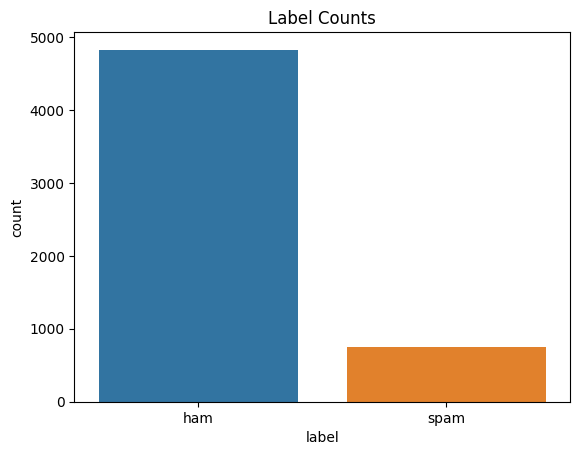

In [ ]:
fig = sns.countplot(x= 'label',data = df)
plt.title('Label Counts')
plot = fig.get_figure()

In [ ]:
#balancing data

ham_rows=df.shape[0]-spam.shape[0]
ratio=int(ham_rows/spam.shape[0])
df_spam=pd.concat([spam]*(ratio-1))
dataset=pd.concat([df,spam])
dataset['label'].value_counts()

ham     4826
spam    1494
Name: label, dtype: int64

**Pembersihan Data**


In [ ]:
import nltk
nltk.download('punkt') # For tokenize
nltk.download('stopwords') # For a standard list of stopwords.
nltk.download('wordnet') # For lemmatisation.
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#copy raw dataset
df_preprocessing = dataset.copy()
df_preprocessing = df_preprocessing[['message']]

In [ ]:
print(df_preprocessing['message'].head(50))

0                         Ok lar... Joking wif u oni...
1     Free entry in 2 a wkly comp to win FA Cup fina...
2     U dun say so early hor... U c already then say...
3     Nah I don't think he goes to usf, he lives aro...
4     FreeMsg Hey there darling it's been 3 week's n...
5     Even my brother is not like to speak with me. ...
6     As per your request 'Melle Melle (Oru Minnamin...
7     WINNER!! As a valued network customer you have...
8     Had your mobile 11 months or more? U R entitle...
9     I'm gonna be home soon and i don't want to tal...
10    SIX chances to win CASH! From 100 to 20,000 po...
11    URGENT! You have won a 1 week FREE membership ...
12    I've been searching for the right words to tha...
13                  I HAVE A DATE ON SUNDAY WITH WILL!!
14    XXXMobileMovieClub: To use your credit, click ...
15                           Oh k...i'm watching here:)
16    Eh u remember how 2 spell his name... Yes i di...
17    Fine if thats the way u feel. Thats the 

In [ ]:
# Proses menghilangkan karakter spesial
def menghapus_karakter_special(Text):
    # Menambahakan spasi setelah titik atau koma
    Text =  re.sub(r"(?<=[.,])(?=[^\s])", r" ", str(Text))
    # Hapus karakter non-ascii dari string
    Text = re.sub(r"[^\x00-\x7f]",r" ", str(Text))
    # Ganti 2+ titik dengan spasi
    Text = re.sub(r"\.{2,}", " ", str(Text))
    # Hapus baris baru
    Text = str(Text).replace("\\n", "")
    # Hapus hashtags
    Text = re.sub(r"#", "", str(Text))
    # Hapus @username
    Text = re.sub('@[^\s]+','',Text)
    # Hapus karakter huruf tunggal
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))
    # # Hapus angka
    # Text = re.sub("[0-9]+", "", str(Text))
    # Hapus url
    Text = re.sub(r"http\S+", "", str(Text))
    # Hapus spasi biasa
    Text = str(Text).strip(' "\'')
    # Hapus spasi/jarak yang berlebihan
    Text = re.sub(r"\s+", " ", str(Text))
    # Hapus tanda baca
    Text = str(Text).translate(str.maketrans("","",string.punctuation))
    # Hapus url yang tidak lengkap
    return str(Text).replace("http://", " ").replace("https://", " ")



dataset['message'] = dataset['message'].apply(menghapus_karakter_special)
df_preprocessing['cleansing'] = dataset['message']

print('Remove Special Character Result : \n')
print(dataset['message'].head(50))

Remove Special Character Result : 

0                             Ok lar   Joking wif oni  
1     Free entry in 2 wkly comp to win FA Cup final ...
2             dun say so early hor   already then say  
3     Nah don think he goes to usf he lives around h...
4     FreeMsg Hey there darling it been 3 week now a...
5     Even my brother is not like to speak with me T...
6     As per your request Melle Melle Oru Minnaminun...
7     WINNER As valued network customer you have bee...
8     Had your mobile 11 months or more entitled to ...
9     gonna be home soon and don want to talk about ...
10    SIX chances to win CASH From 100 to 20 000 pou...
11    URGENT You have won 1 week FREE membership in ...
12    ve been searching for the right words to thank...
13                        HAVE DATE ON SUNDAY WITH WILL
14    XXXMobileMovieClub To use your credit click th...
15                                 Oh     watching here
16    Eh remember how 2 spell his name   Yes did He ...
17      Fine

In [ ]:
# Prosel menghilangkan emoticon/emoji
def remove_emoji(Text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    Text = emoji_pattern.sub(r'', Text)
    return emoji_pattern.sub(r'', Text)

dataset['message'] = dataset['message'].apply(remove_emoji)
df_preprocessing['remove_emoticon'] = dataset['message']

print('Remove Emoticon : \n')
print(dataset['message'].head(50))

Remove Emoticon : 

0                             Ok lar   Joking wif oni  
1     Free entry in 2 wkly comp to win FA Cup final ...
2             dun say so early hor   already then say  
3     Nah don think he goes to usf he lives around h...
4     FreeMsg Hey there darling it been 3 week now a...
5     Even my brother is not like to speak with me T...
6     As per your request Melle Melle Oru Minnaminun...
7     WINNER As valued network customer you have bee...
8     Had your mobile 11 months or more entitled to ...
9     gonna be home soon and don want to talk about ...
10    SIX chances to win CASH From 100 to 20 000 pou...
11    URGENT You have won 1 week FREE membership in ...
12    ve been searching for the right words to thank...
13                        HAVE DATE ON SUNDAY WITH WILL
14    XXXMobileMovieClub To use your credit click th...
15                                 Oh     watching here
16    Eh remember how 2 spell his name   Yes did He ...
17      Fine if that the way

In [ ]:
# Prosel melakukan tokenizing
def word_tokenize_wrapper(Text):
    return word_tokenize(Text)

dataset['message'] = dataset['message'].apply(word_tokenize_wrapper)
df_preprocessing['tokenizing'] = dataset['message']

print('Tokenizing Result : \n')
print(dataset['message'].head(50))

Tokenizing Result : 

0                           [Ok, lar, Joking, wif, oni]
1     [Free, entry, in, 2, wkly, comp, to, win, FA, ...
2        [dun, say, so, early, hor, already, then, say]
3     [Nah, don, think, he, goes, to, usf, he, lives...
4     [FreeMsg, Hey, there, darling, it, been, 3, we...
5     [Even, my, brother, is, not, like, to, speak, ...
6     [As, per, your, request, Melle, Melle, Oru, Mi...
7     [WINNER, As, valued, network, customer, you, h...
8     [Had, your, mobile, 11, months, or, more, enti...
9     [gon, na, be, home, soon, and, don, want, to, ...
10    [SIX, chances, to, win, CASH, From, 100, to, 2...
11    [URGENT, You, have, won, 1, week, FREE, member...
12    [ve, been, searching, for, the, right, words, ...
13                 [HAVE, DATE, ON, SUNDAY, WITH, WILL]
14    [XXXMobileMovieClub, To, use, your, credit, cl...
15                                 [Oh, watching, here]
16    [Eh, remember, how, 2, spell, his, name, Yes, ...
17    [Fine, if, that, the

In [ ]:
# ----------------Get stopword from NLTK stopword ---------
# Dapatkan stopword bahasa Inggris
list_stopwords = stopwords.words('english')
# Ubah daftar menjadi kamus stopwords
list_stopwords = set(list_stopwords)

# Hapus stopword dari daftar token
def stopwords_removal(words):
 return [word for word in words if word not in list_stopwords]

dataset['message'] = dataset['message'].apply(stopwords_removal)
df_preprocessing['stopwords'] = dataset['message']

print('Stopword Removal Result : \n')
print(dataset['message'].head(50))

Stopword Removal Result : 

0                           [Ok, lar, Joking, wif, oni]
1     [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
2                  [dun, say, early, hor, already, say]
3        [Nah, think, goes, usf, lives, around, though]
4     [FreeMsg, Hey, darling, 3, week, word, back, l...
5     [Even, brother, like, speak, They, treat, like...
6     [As, per, request, Melle, Melle, Oru, Minnamin...
7     [WINNER, As, valued, network, customer, select...
8     [Had, mobile, 11, months, entitled, Update, la...
9     [gon, na, home, soon, want, talk, stuff, anymo...
10    [SIX, chances, win, CASH, From, 100, 20, 000, ...
11    [URGENT, You, 1, week, FREE, membership, 100, ...
12    [searching, right, words, thank, breather, pro...
13                 [HAVE, DATE, ON, SUNDAY, WITH, WILL]
14    [XXXMobileMovieClub, To, use, credit, click, W...
15                                       [Oh, watching]
16    [Eh, remember, 2, spell, name, Yes, He, naught...
17                  

In [ ]:
def join_text_list(Text):
    return ' '.join(Text)

dataset['message'] = dataset['message'].apply(join_text_list)
print(dataset['message'].head(50))

0                                 Ok lar Joking wif oni
1     Free entry 2 wkly comp win FA Cup final tkts 2...
2                         dun say early hor already say
3                Nah think goes usf lives around though
4     FreeMsg Hey darling 3 week word back like fun ...
5     Even brother like speak They treat like aids p...
6     As per request Melle Melle Oru Minnaminunginte...
7     WINNER As valued network customer selected rec...
8     Had mobile 11 months entitled Update latest co...
9     gon na home soon want talk stuff anymore tonig...
10    SIX chances win CASH From 100 20 000 pounds tx...
11    URGENT You 1 week FREE membership 100 000 Priz...
12    searching right words thank breather promise w...
13                        HAVE DATE ON SUNDAY WITH WILL
14    XXXMobileMovieClub To use credit click WAP lin...
15                                          Oh watching
16     Eh remember 2 spell name Yes He naughty make wet
17                          Fine way feel That w

In [ ]:
# Melihat hasil step preprocessing
df_preprocessing

,message,cleansing,remove_emoticon,tokenizing,stopwords
0,Ok lar... Joking wif u oni...,Ok lar Joking wif oni,Ok lar Joking wif oni,"[Ok, lar, Joking, wif, oni]","[Ok, lar, Joking, wif, oni]"
1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 wkly comp to win FA Cup final ...,Free entry in 2 wkly comp to win FA Cup final ...,"[Free, entry, in, 2, wkly, comp, to, win, FA, ...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,U dun say so early hor... U c already then say...,dun say so early hor already then say,dun say so early hor already then say,"[dun, say, so, early, hor, already, then, say]","[dun, say, early, hor, already, say]"
3,"Nah I don't think he goes to usf, he lives aro...",Nah don think he goes to usf he lives around h...,Nah don think he goes to usf he lives around h...,"[Nah, don, think, he, goes, to, usf, he, lives...","[Nah, think, goes, usf, lives, around, though]"
4,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling it been 3 week now a...,FreeMsg Hey there darling it been 3 week now a...,"[FreeMsg, Hey, there, darling, it, been, 3, we...","[FreeMsg, Hey, darling, 3, week, word, back, l..."
...,...,...,...,...,...
5538,Want explicit SEX in 30 secs? Ring 02073162414...,Want explicit SEX in 30 secs Ring 02073162414 ...,Want explicit SEX in 30 secs Ring 02073162414 ...,"[Want, explicit, SEX, in, 30, secs, Ring, 0207...","[Want, explicit, SEX, 30, secs, Ring, 02073162..."
5541,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,"[ASKED, 3MOBILE, IF, 0870, CHATLINES, INCLU, I...","[ASKED, 3MOBILE, IF, 0870, CHATLINES, INCLU, I..."
5548,Had your contract mobile 11 Mnths? Latest Moto...,Had your contract mobile 11 Mnths Latest Motor...,Had your contract mobile 11 Mnths Latest Motor...,"[Had, your, contract, mobile, 11, Mnths, Lates...","[Had, contract, mobile, 11, Mnths, Latest, Mot..."
5567,REMINDER FROM O2: To get 2.50 pounds free call...,REMINDER FROM O2 To get 2 50 pounds free call ...,REMINDER FROM O2 To get 2 50 pounds free call ...,"[REMINDER, FROM, O2, To, get, 2, 50, pounds, f...","[REMINDER, FROM, O2, To, get, 2, 50, pounds, f..."


In [ ]:
# Simpan ke file csv
dataset.to_csv('/content/drive/MyDrive/2023/Kuliah/Mechine Learning/sms+spam+collection/sms-Clean.csv', index=False)

# Simpan ke file csv
df_preprocessing.to_csv('/content/drive/MyDrive/2023/Kuliah/Mechine Learning/sms+spam+collection/Hasil Preprocessing.csv', index=False)

# **Exploratory Data Analysis (EDA)**


In [ ]:
sms_df = pd.read_csv('/content/drive/MyDrive/2023/Kuliah/Mechine Learning/sms+spam+collection/sms-Clean.csv')
sms_df

,label,message
0,ham,Ok lar Joking wif oni
1,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
2,ham,dun say early hor already say
3,ham,Nah think goes usf lives around though
4,spam,FreeMsg Hey darling 3 week word back like fun ...
...,...,...
6315,spam,Want explicit SEX 30 secs Ring 02073162414 Cos...
6316,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
6317,spam,Had contract mobile 11 Mnths Latest Motorola N...
6318,spam,REMINDER FROM O2 To get 2 50 pounds free call ...


In [ ]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6320 entries, 0 to 6319
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    6320 non-null   object
 1   message  6315 non-null   object
dtypes: object(2)
memory usage: 98.9+ KB


In [ ]:
def convertlabel(x):
  if x=='spam':
    return 1
  else:
    return 0

sms_df['label']=sms_df['label'].apply(lambda x : convertlabel(x))
sms_df.head()

,label,message
0,0,Ok lar Joking wif oni
1,1,Free entry 2 wkly comp win FA Cup final tkts 2...
2,0,dun say early hor already say
3,0,Nah think goes usf lives around though
4,1,FreeMsg Hey darling 3 week word back like fun ...


In [ ]:
dataset['label']=dataset['label'].apply(lambda x : convertlabel(x))
dataset.head()

,label,message
0,0,Ok lar Joking wif oni
1,1,Free entry 2 wkly comp win FA Cup final tkts 2...
2,0,dun say early hor already say
3,0,Nah think goes usf lives around though
4,1,FreeMsg Hey darling 3 week word back like fun ...


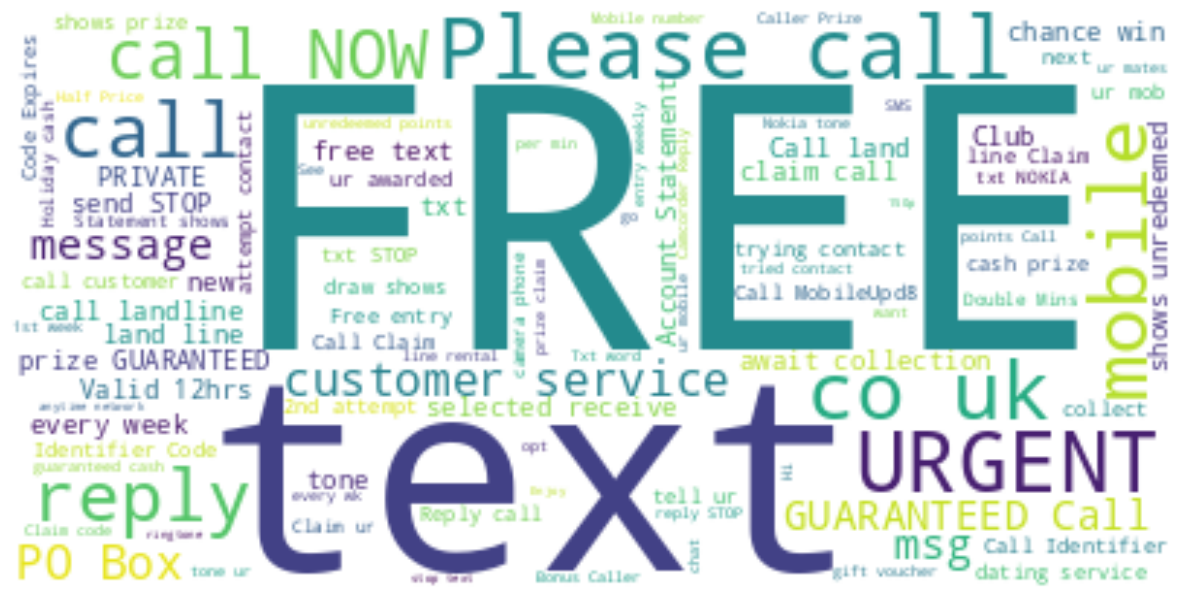

In [ ]:
from wordcloud import WordCloud
message_spam=' '.join(list(sms_df[sms_df['label'] == 1]['message']))
plt.figure(figsize=(15,15))
wc=WordCloud(background_color="white", max_words=100)
wc.generate(message_spam)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

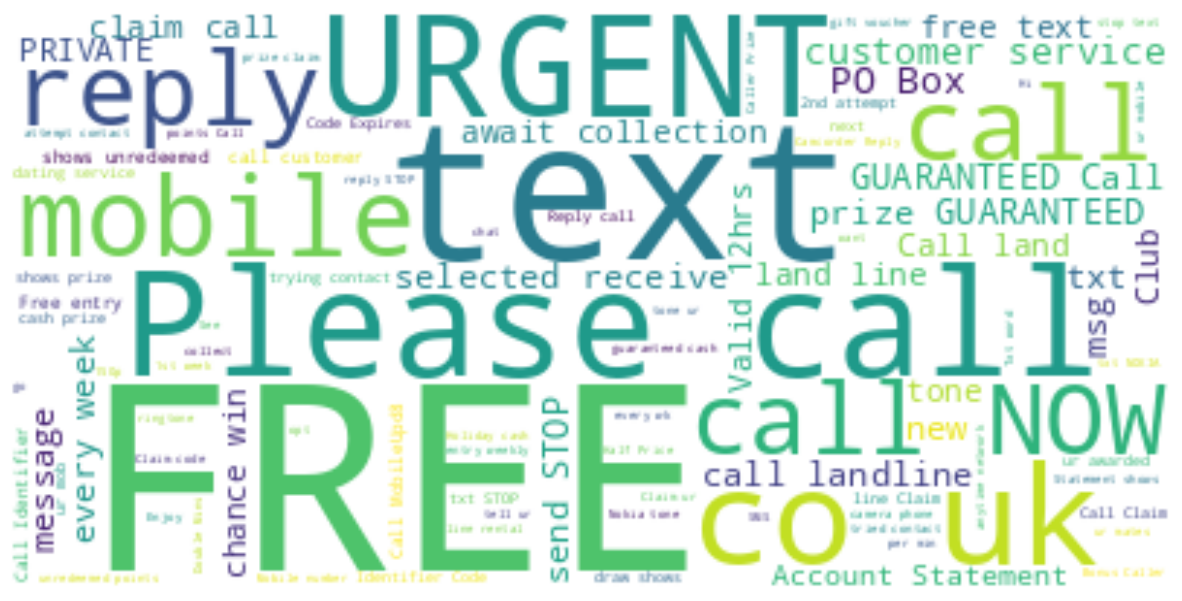

In [ ]:
message_ham=' '.join(list(sms_df[sms_df['label'] == 0]['message'].astype(str).tolist()))
plt.figure(figsize=(15,15))
wc=WordCloud(background_color="white", max_words=100)
wc.generate(message_spam)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 0 to 5568
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    6320 non-null   int64 
 1   message  6320 non-null   object
dtypes: int64(1), object(1)
memory usage: 148.1+ KB


# **Pembangunan Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
Vectors=tfidf.fit_transform(list(dataset['message'])).toarray()
print(Vectors.shape)

(6320, 500)


In [ ]:
#membandingkan ukuran antra dataset dengan sms_df
sms_df['message'].fillna('', inplace=True)
sms_df['message'] = sms_df['message'].astype(str)
tfidf = TfidfVectorizer(max_features=500)
Vectors = tfidf.fit_transform(sms_df['message']).toarray()
print(Vectors.shape)

(6320, 500)


In [ ]:
#data balancing
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=60
pca_data=pca.fit_transform(Vectors)

In [ ]:
#Mengonversi pesan teks menjadi vektor menggunakan TFIDFVectorizer dan menggabungkannya dengan Kumpulan Data Aktual

Temp_Dataset=pd.DataFrame(pca_data.tolist(),index=dataset.index)
Final_Dataset=pd.concat([dataset,Temp_Dataset],axis=1)
Final_Dataset=Final_Dataset.drop(['message'],axis=1)
Final_Dataset.head()


,label,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,0,-0.182314,0.354960,0.095763,-0.020438,0.017109,-0.015415,-0.000058,-0.001231,-0.024025,...,-0.021758,0.016971,-0.022421,0.021346,-0.022527,-0.001308,-0.010705,-0.047594,-0.004406,0.013009
1,1,0.104807,-0.044369,0.212523,0.065003,0.014864,-0.034957,0.021962,-0.021781,-0.042266,...,-0.034032,0.043208,0.009019,0.043714,0.034334,-0.054088,-0.033979,0.003916,0.034507,0.002223
2,0,-0.066584,-0.012077,-0.035140,-0.014684,-0.020474,0.003580,0.032567,-0.059923,0.004026,...,-0.000152,0.067763,-0.030233,0.005387,-0.123989,0.102270,-0.063374,-0.070008,-0.077091,0.077313
3,0,-0.055163,-0.029444,-0.037389,-0.006993,0.021617,0.003148,-0.007442,0.010097,0.024346,...,-0.110087,0.027443,0.137686,-0.024659,-0.010200,0.067464,0.105376,-0.022661,-0.009225,-0.044427
4,1,-0.127795,0.141731,0.103178,-0.004733,0.098295,-0.037539,-0.018464,-0.031212,0.010148,...,0.020655,-0.011301,-0.036154,0.084446,-0.028851,0.075471,0.066414,-0.088667,-0.087157,0.079763


In [ ]:
import pickle
pickle.dump(tfidf, open('tfidf_transform.pkl', 'wb'))

In [ ]:
X=Final_Dataset.iloc[:,1:]
y=Final_Dataset['label']

from sklearn.model_selection import train_test_split

##Spliting train and test data with 30% test size
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
X.shape

(6320, 60)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
import numpy as np

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
criterion=['gini','entropy']
max_depth=[1,2,5,10,20]
min_samples_split=[2,3,4]
max_features=['sqrt','log2']

param={'n_estimators':n_estimators,
       'criterion':criterion,
       'max_depth':max_depth,
       'min_samples_split':min_samples_split,
       'max_features':max_features
       }

rf_random=RandomizedSearchCV(estimator=rf, param_distributions=param, n_iter=20, scoring='f1',cv=5,verbose=0)
rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='f1')

In [ ]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'gini'}

In [ ]:
prediction=rf_random.predict(X_test)

<ipython-input-43-432c6c804098>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction,color='r')


<Axes: xlabel='label', ylabel='Density'>

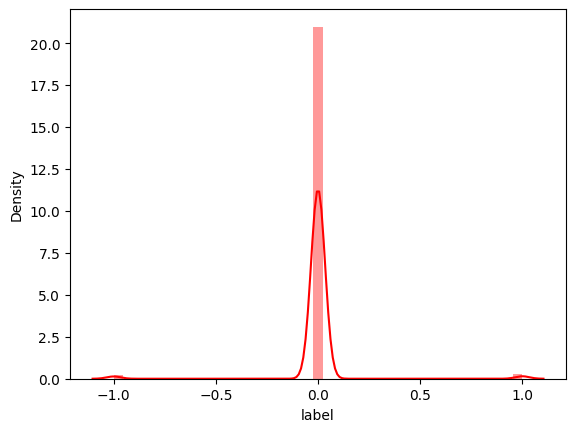

In [ ]:
sns.distplot(y_test-prediction,color='r')

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1442
           1       0.95      0.95      0.95       454

    accuracy                           0.98      1896
   macro avg       0.97      0.97      0.97      1896
weighted avg       0.98      0.98      0.98      1896



Text(0.5, 1.0, 'Confusion Matrix')

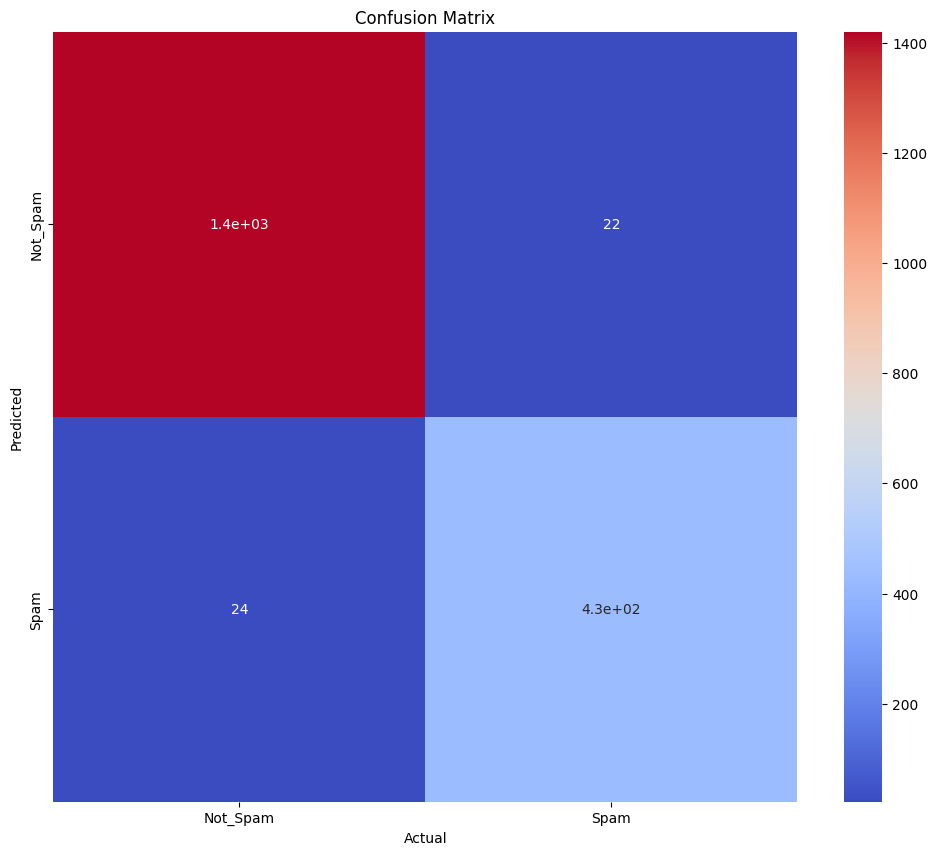

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=confusion_matrix(y_test,prediction),annot=True,cmap="coolwarm",xticklabels=['Not_Spam', 'Spam'], yticklabels=['Not_Spam', 'Spam'] )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

**XGBOOST**


In [ ]:
import xgboost

xgb=xgboost.XGBClassifier()
#randomsearch=RandomizedSearchCV(estimator=xgb, param_distributions=param, n_iter=20, scoring='roc_auc',cv=5,verbose=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictionxgb=xgb.predict(X_test)
print(classification_report(y_test,predictionxgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1442
           1       0.94      0.98      0.96       454

    accuracy                           0.98      1896
   macro avg       0.97      0.98      0.97      1896
weighted avg       0.98      0.98      0.98      1896



Text(0.5, 1.0, 'Confusion Matrix')

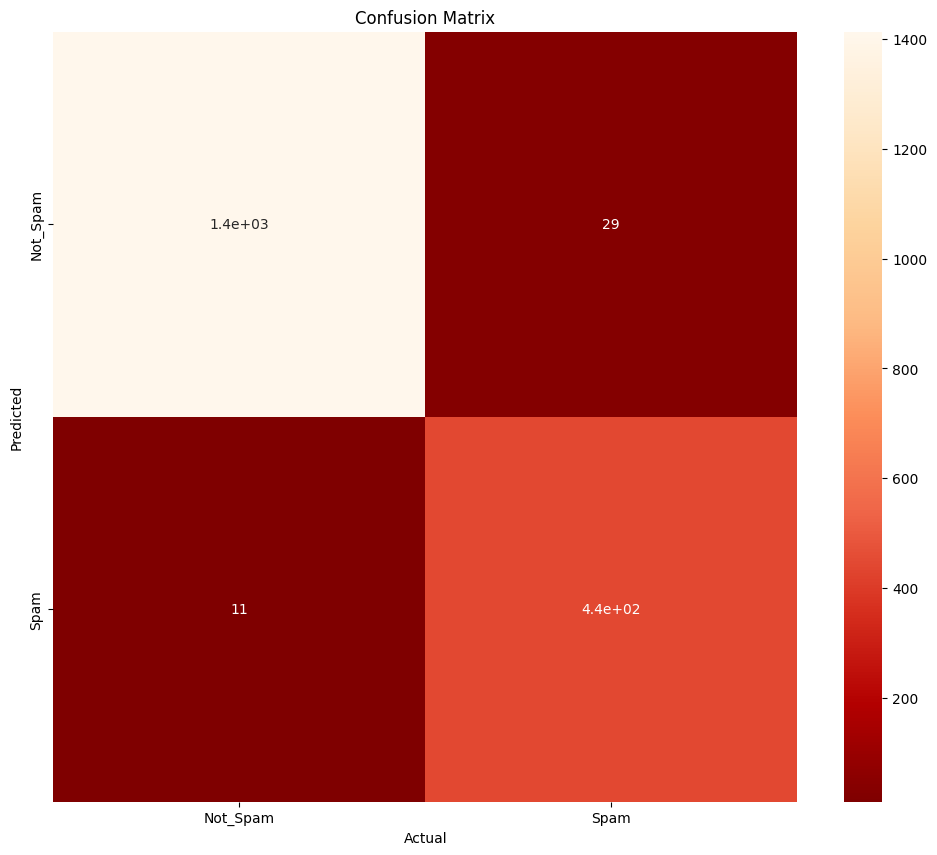

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=confusion_matrix(y_test,predictionxgb),annot=True,cmap="OrRd_r",xticklabels=['Not_Spam', 'Spam'], yticklabels=['Not_Spam', 'Spam'] )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

# **Evaluasi dan Pengujian**

In [ ]:
import pickle

pickle.dump(rf_random,open('spamclassifier.pkl','wb'))

In [ ]:
from sklearn.decomposition import PCA

# Assuming you have your feature matrix as 'Vectors'
pca = PCA(n_components=60)
pca_data = pca.fit_transform(Vectors)

# Save the PCA object
pickle.dump(pca, open('pca_transform.pkl', 'wb'))

In [ ]:
# Load model, vectorizer, and PCA transformation object
loaded_model = pickle.load(open('/content/spamclassifier.pkl', 'rb')) #model untuk melatih data
loaded_vectorizer = pickle.load(open('/content/tfidf_transform.pkl', 'rb')) #model yang digunakan untuk mengubah huruf menjadi numerik
loaded_pca = pickle.load(open('/content/pca_transform.pkl', 'rb'))  # Replace with your PCA object file -> model untuk membalancing data

def clean_and_preprocess(text):
    # Proses pembersihan teks (sesuaikan langkah ini sesuai dengan preprocessing Anda)
    text = re.sub(r"[^\x00-\x7f]", r" ", text)  # contoh pembersihan
    text = re.sub(r"\s+", " ", text)
    text = text.lower()  # mengubah ke huruf kecil
    text = word_tokenize(text)  # tokenizing
    text = [word for word in text if word not in stopwords.words('english')]  # menghilangkan stopwords
    text = ' '.join(text)
    return text

def predict_spam(message):
    cleaned_message = clean_and_preprocess(message)
    vectorized_message = loaded_vectorizer.transform([cleaned_message])
    pca_transformed_message = loaded_pca.transform(vectorized_message.toarray())  # Applying PCA transformation
    prediction = loaded_model.predict(pca_transformed_message)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Contoh penggunaan
new_message = input("Message :")
print(predict_spam(new_message))

Message :Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Spam


In [ ]:
# Contoh penggunaan
new_message = input("Message :")
print(predict_spam(new_message))

Message :Pls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola
Not Spam


# **Hasil dan Analisis**

Dalam penelitian ini, hasil analisis menunjukkan bahwa metode Random Forest dan XGBoost keduanya efektif dalam mengklasifikasikan spam SMS, namun dengan keunggulan yang berbeda. Analisis data mengungkapkan bahwa Random Forest memberikan hasil yang sangat baik dalam hal akurasi dan mengurangi overfitting, berkat pendekatannya yang menggabungkan prediksi dari banyak pohon keputusan. Di sisi lain, XGBoost menonjol dalam kecepatan pemrosesan dan kemampuan dalam menangani data berdimensi besar, dengan pendekatan pembelajaran berurutan yang meminimalkan kesalahan sebelumnya.Analisis lebih lanjut menunjukkan bahwa XGBoost cenderung lebih efisien dalam kasus data yang sangat besar dan kompleks, sementara Random Forest lebih disukai untuk data yang memerlukan analisis kompleks dengan fitur yang lebih beragam.




# **Kesimpulan**
Hasil akurasi ini menunjukkan bagaimana teknologi pembelajaran mesin, khususnya melalui metode Random Forest dan XGBoost, dapat digunakan secara efektif untuk mengatasi masalah spam SMS. Kedua metode ini memberikan solusi inovatif dan efisien dalam deteksi dan penyaringan spam.

Random Forest, dengan pendekatannya yang berbasis banyak pohon keputusan, berhasil mengurangi overfitting dan meningkatkan akurasi dalam klasifikasi teks. Sementara itu, XGBoost menonjol dalam efisiensi pemrosesan data besar dan menghasilkan kinerja klasifikasi yang unggul, berkat algoritma pembelajaran berurutan dan optimisasinya.